In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [195]:
ian = pd.read_csv('ian/ian_posts1.csv')
idalia = pd.read_csv('idalia/idalia_posts1.csv')
milton = pd.read_csv('milton/milton_posts.csv')

milton = milton[(milton["createTime"] >= "2024-10-01") & (milton["createTime"] <= "2024-10-15")]
ian = ian[(ian["createTime"] >= "2022-09-14") & (ian["createTime"] <= "2022-10-28")]
idalia = idalia[(idalia["createTime"] >= "2023-08-20") & (idalia["createTime"] <= "2023-9-10")]

milton = milton.loc[milton.groupby('createTime')['commentCount'].idxmax()]
milton = milton.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

idalia = idalia.loc[idalia.groupby('createTime')['commentCount'].idxmax()]
idalia = idalia.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

ian = ian.loc[ian.groupby('createTime')['commentCount'].idxmax()]
ian = ian.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

print(milton.shape, ian.shape, idalia.shape)

(12, 8) (34, 8) (39, 8)


In [196]:
def barplot_subplots(dataset, degree):
    x = np.arange(len(dataset["createTime"]))
    share_y = dataset["shareCount"]
    share_coeffs = np.polyfit(x, share_y, deg=degree)
    share_poly = np.poly1d(share_coeffs)
    x_smooth = np.linspace(x.min(), x.max(), 200)
    share_y_smooth = share_poly(x_smooth)
    
    comment_y = dataset["commentCount"]
    comment_coeffs = np.polyfit(x, comment_y, deg=degree)
    comment_poly = np.poly1d(comment_coeffs)
    comment_y_smooth = comment_poly(x_smooth)
    
    start_date = dataset["createTime"][0]
    end_date = dataset["createTime"].iloc[-1] if hasattr(dataset["createTime"], "iloc") else dataset["createTime"][-1]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
    
    axes[0].bar(dataset["createTime"], share_y, color='black', alpha=0.7, label='Share Count')
    axes[0].plot(x_smooth, share_y_smooth, color='red', linewidth=2, label='Deg3 Regression')
    axes[0].set_title('Shares vs Time', fontsize=16)
    axes[0].set_ylabel('Number of Shares', fontsize=14)
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)
    axes[0].legend()
    
    axes[1].bar(dataset["createTime"], comment_y, color='black', alpha=0.7, label='Comment Count')
    axes[1].plot(x_smooth, comment_y_smooth, color='orange', linewidth=2, label='Deg3 Regression')
    axes[1].set_title(f'Comments vs Time', fontsize=16)
    axes[1].set_ylabel('Number of Comments', fontsize=14)
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)
    axes[1].legend()
    
    plt.xticks(ticks=[x[0], x[-1]], labels=[start_date, end_date], rotation=45)
    
    plt.tight_layout()
    plt.show()

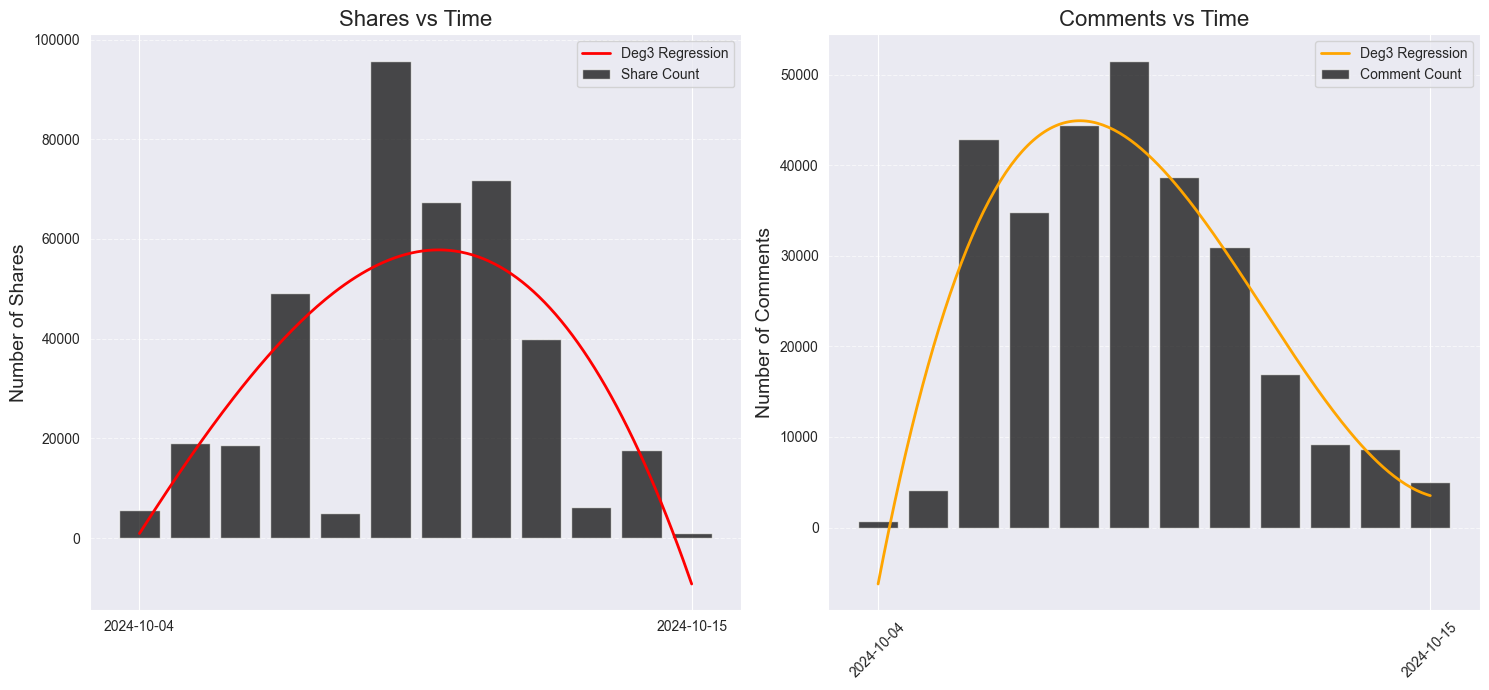

In [197]:
barplot_subplots(milton, 3)

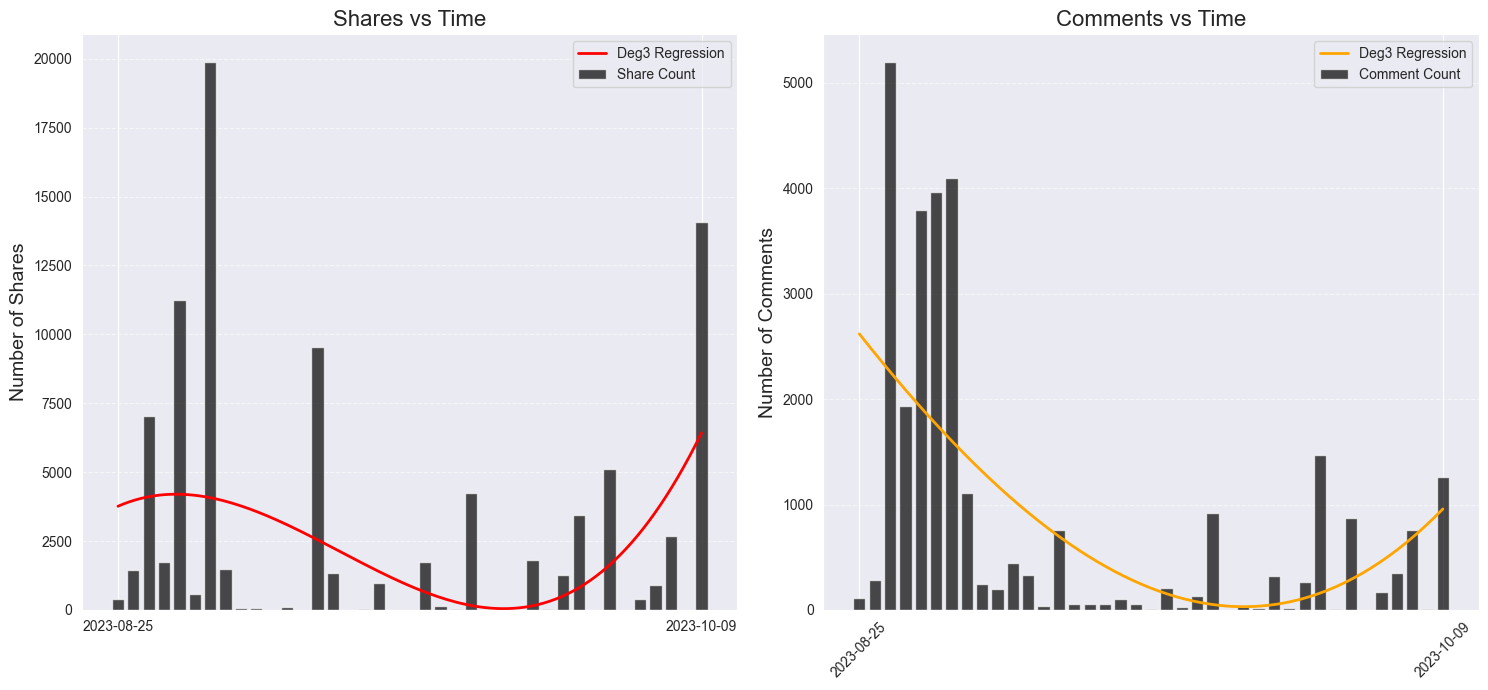

In [198]:
barplot_subplots(idalia, 3)

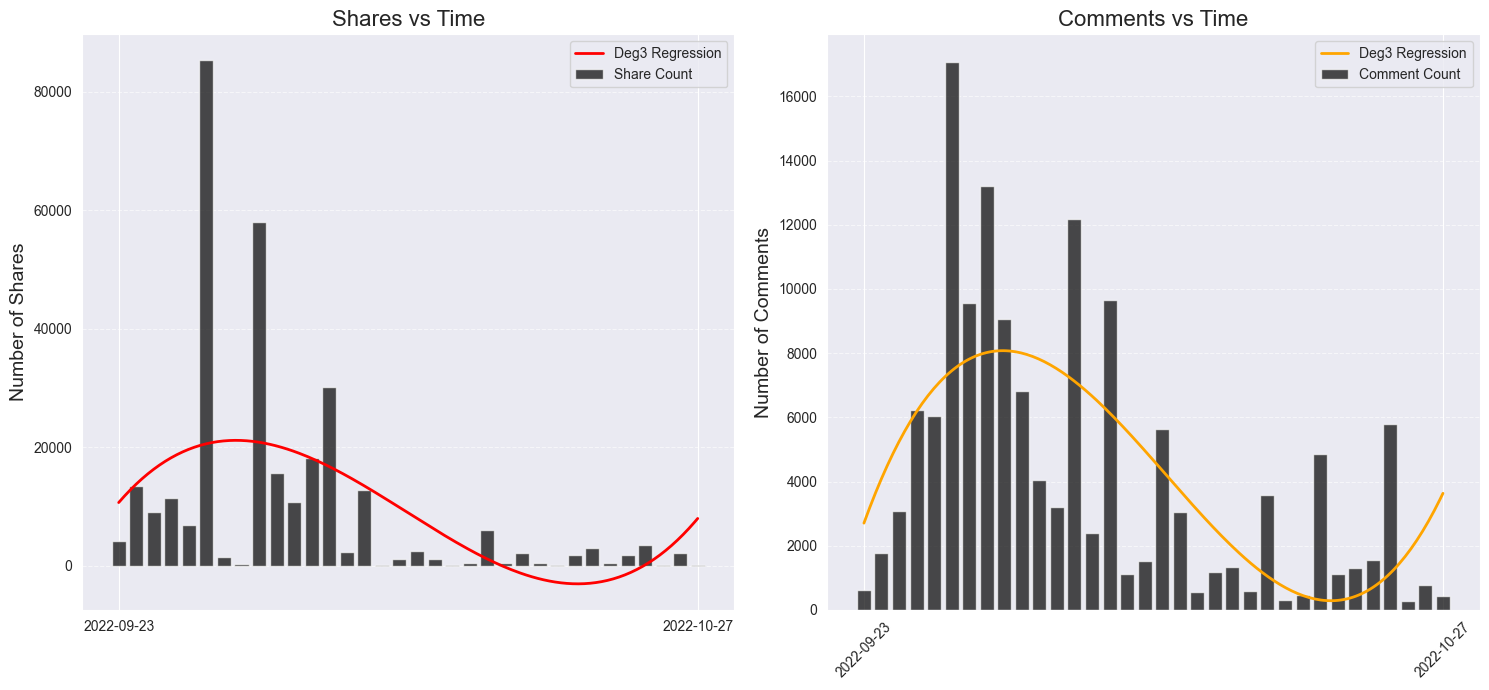

In [199]:
barplot_subplots(ian, 3)

In [200]:
cc_ian = pd.read_csv('climatechange/cilmatechange_ian_postsTOT.csv')
cc_idalia = pd.read_csv('climatechange/cilmatechange_idalia_postsTOT.csv')
cc_milton = pd.read_csv('climatechange/climatechange_milton_posts.csv')

In [201]:
# merge all climate change data

df = pd.merge(cc_ian, cc_idalia, on='id', how='outer').drop_duplicates()
df = pd.merge(df, cc_milton, on='id', how='outer').drop_duplicates()

df

,id,createTime_x,authorId_x,text_x,video.urls_x,shareCount_x,playCount_x,commentCount_x,createTime_y,authorId_y,...,shareCount_y,playCount_y,commentCount_y,createTime,authorId,text,video.urls,shareCount,playCount,commentCount
0,7128429803769695530,2022-08-05,6.832422e+18,our hands and hearts are tired #protectwhitesa...,['https://v77.tiktokcdn-eu.com/b7de3444704d4ca...,1312.0,207624.0,1183.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7128478326401895686,2022-08-05,6.982147e+18,BREAKING: Tonight we confronted Liz Truss at t...,['https://v77.tiktokcdn-eu.com/43e00d8a492ceb1...,1441.0,436324.0,2567.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7128577178912083246,2022-08-06,6.725985e+18,#inflationreductionact #climatechange #healthc...,['https://v77.tiktokcdn-eu.com/9071ff5afc5b60a...,671.0,585702.0,1227.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7129094870995700997,2022-08-07,6.776637e+18,One look af danicas page and realised ahe was ...,['https://v77.tiktokcdn-eu.com/b0cb7a25c371a8f...,252.0,1668585.0,1770.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7129197611604659461,2022-08-07,7.048170e+18,"Nos queda poco tiempo, cuidemos nuestro planet...",['https://v77.tiktokcdn-eu.com/a44d49c9fa5ff3c...,8810.0,192422.0,964.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,7460584846117883182,2025-01-16,5.406801e+16,Sen. Bernie Sanders pressed Trump EPA pick Lee...,['https://v77.tiktokcdn-eu.com/01511270382d53c...,1085.0,679312.0,3175.0,2025-01-16,5.406801e+16,...,1084.0,679247.0,3175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,7460593487759641899,2025-01-16,5.406801e+16,"""It was the fossil fuel industry."" Senator Ber...",['https://v77.tiktokcdn-eu.com/427340eba399aee...,947.0,2071581.0,2091.0,2025-01-16,5.406801e+16,...,947.0,2071324.0,2091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,7460821496974347538,2025-01-17,7.391876e+18,مری کے جنگلات میں بھڑکتی ہوئی آگ، جو قیمتی درخ...,['https://sf16-music.tiktokcdn-eu.com/obj/ies-...,3111.0,575583.0,1626.0,2025-01-17,7.391876e+18,...,3111.0,575445.0,1625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,7461658143420960022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-19,6.822666e+18,...,0.0,412.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
# drop id, authorId_x, text_x, video.urls_x
df = df.drop(columns=['id', 'authorId_x', 'text_x', 'video.urls_x'])

# drop columns from column 5 to 18
df = df.drop(df.columns[4:], axis=1)

# drop NA values
df = df.dropna()

In [203]:
# convert shareCount_x, playCount_x, commentCount_x to int
df['shareCount_x'] = df['shareCount_x'].astype(int)
df['playCount_x'] = df['playCount_x'].astype(int)
df['commentCount_x'] = df['commentCount_x'].astype(int)

# convert createTime_x to datetime
df['createTime_x'] = pd.to_datetime(df['createTime_x'])

df

,createTime_x,shareCount_x,playCount_x,commentCount_x
0,2022-08-05,1312,207624,1183
1,2022-08-05,1441,436324,2567
2,2022-08-06,671,585702,1227
3,2022-08-07,252,1668585,1770
4,2022-08-07,8810,192422,964
...,...,...,...,...
1946,2025-01-15,61605,3082007,2377
1947,2025-01-15,17072,14114036,6339
1948,2025-01-16,1085,679312,3175
1949,2025-01-16,947,2071581,2091


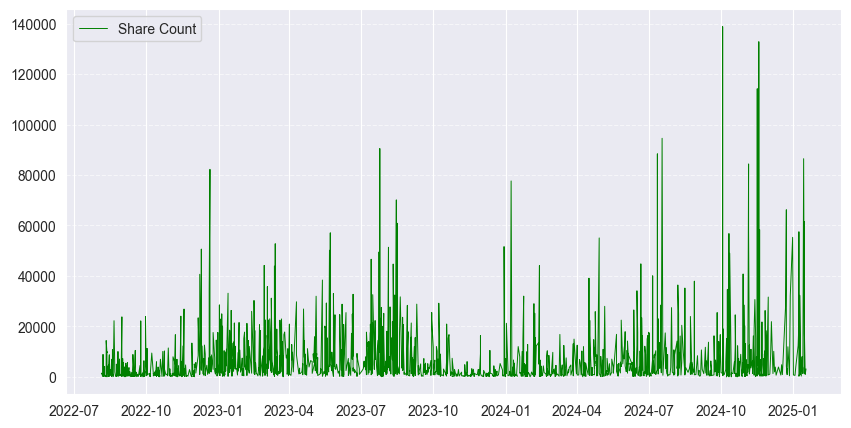

In [204]:
# plot share count vs date

plt.figure(figsize=(10, 5))
plt.plot(df['createTime_x'], df['shareCount_x'], color='g', label='Share Count', linewidth=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


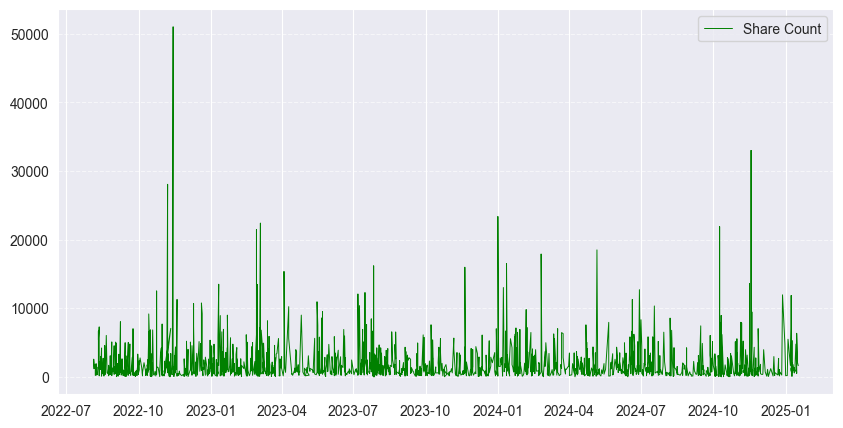

In [205]:
# plot comm count vs date

plt.figure(figsize=(10, 5))
plt.plot(df['createTime_x'], df['commentCount_x'], color='g', label='Share Count', linewidth=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


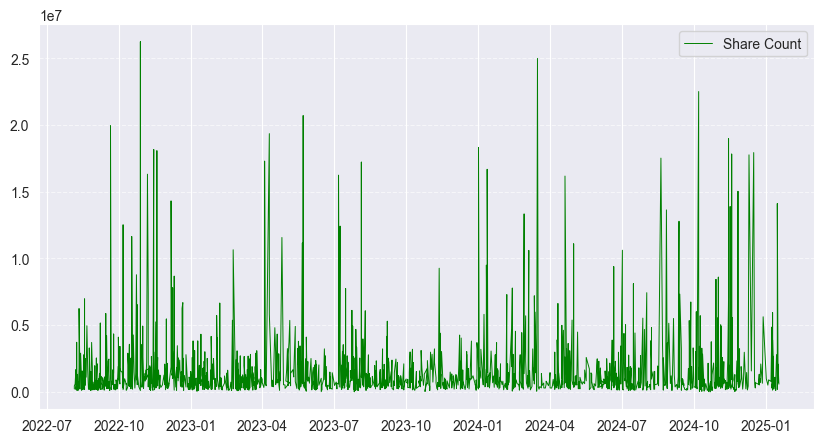

In [206]:
# plot play count vs date

plt.figure(figsize=(10, 5))
plt.plot(df['createTime_x'], df['playCount_x'], color='g', label='Share Count', linewidth=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


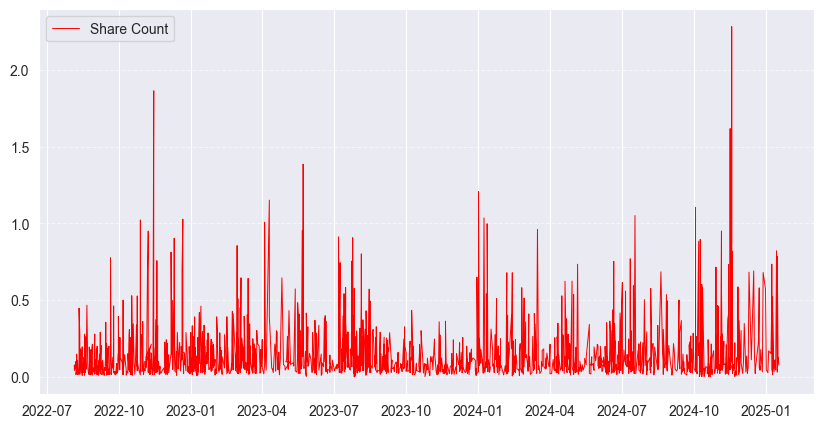

In [207]:
# plot all normalized counts together

df['shareCount_x'] = df['shareCount_x'] / df['shareCount_x'].max()
df['playCount_x'] = df['playCount_x'] / df['playCount_x'].max()
df['commentCount_x'] = df['commentCount_x'] / df['commentCount_x'].max()

plt.figure(figsize=(10, 5))
plt.plot(df['createTime_x'], df['playCount_x'] + df['shareCount_x']  + df['commentCount_x'], color='red', label='Share Count', linewidth=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


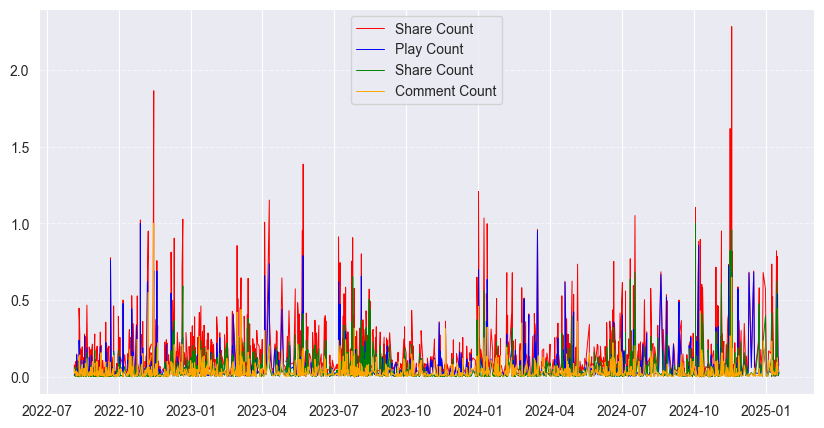

In [208]:
# same plot but with each differentiated

plt.figure(figsize=(10, 5))
plt.plot(df['createTime_x'], df['playCount_x'] + df['shareCount_x']  + df['commentCount_x'], color='red', label='Share Count', linewidth=0.7)
plt.plot(df['createTime_x'], df['playCount_x'], color='blue', label='Play Count', linewidth=0.7)
plt.plot(df['createTime_x'], df['shareCount_x'], color='green', label='Share Count', linewidth=0.7)
plt.plot(df['createTime_x'], df['commentCount_x'], color='orange', label='Comment Count', linewidth=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [209]:
# curve fit

x = np.arange(len(df["createTime_x"]))
y = df['playCount_x'] + df['shareCount_x']  + df['commentCount_x']
y = y / y.max()
coeffs = np.polyfit(x, y, deg=6)
poly = np.poly1d(coeffs)
x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = poly(x_smooth)

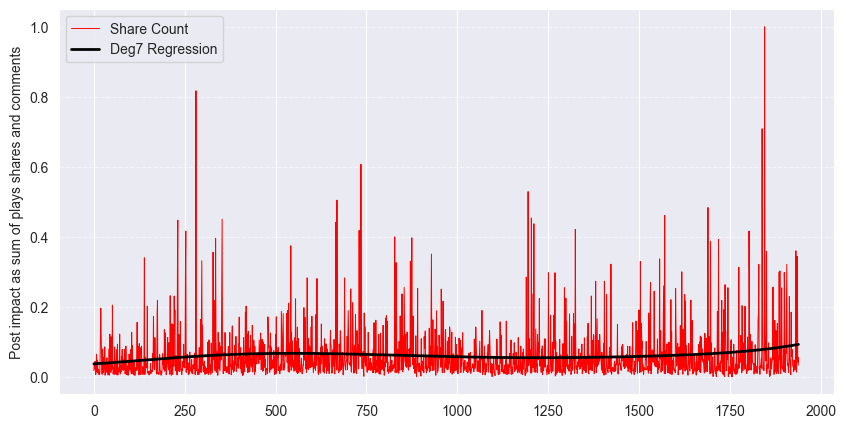

In [210]:
# only plot regression

plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red', label='Share Count', linewidth=0.7)
plt.plot(x_smooth, y_smooth, color='black', linewidth=2, label='Deg7 Regression')
plt.ylabel(f'Post impact as sum of plays shares and comments')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [211]:
# poly regression but not including values of y under some threshold

n = 0.12
degree = 4

y = y[y > n]
x = np.arange(len(y))
coeffs = np.polyfit(x, y, deg=degree)
poly = np.poly1d(coeffs)
x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = poly(x_smooth)


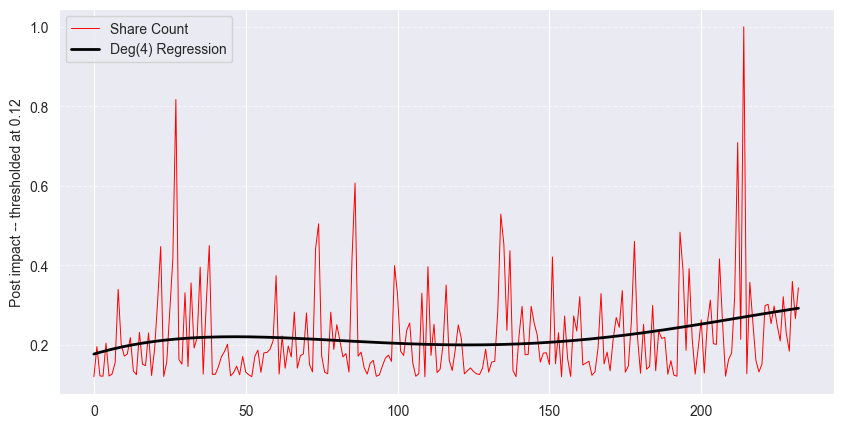

In [212]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red', label='Share Count', linewidth=0.7)
plt.plot(x_smooth, y_smooth, color='black', linewidth=2, label=f'Deg({degree}) Regression')
plt.ylabel(f'Post impact -- thresholded at {n}')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [213]:
# trying some feature engineering
# Impact Score=(Play Count×Share Count)+(Play Count×Comment Count)+(Share Count×Comment Count)

degree = 4

x = np.arange(len(df["createTime_x"]))
y = df['playCount_x'] * df['shareCount_x'] + df['playCount_x'] * df['commentCount_x'] + df['shareCount_x'] * df['commentCount_x']
coeffs = np.polyfit(x, y, deg=degree)
poly = np.poly1d(coeffs)
x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = poly(x_smooth)

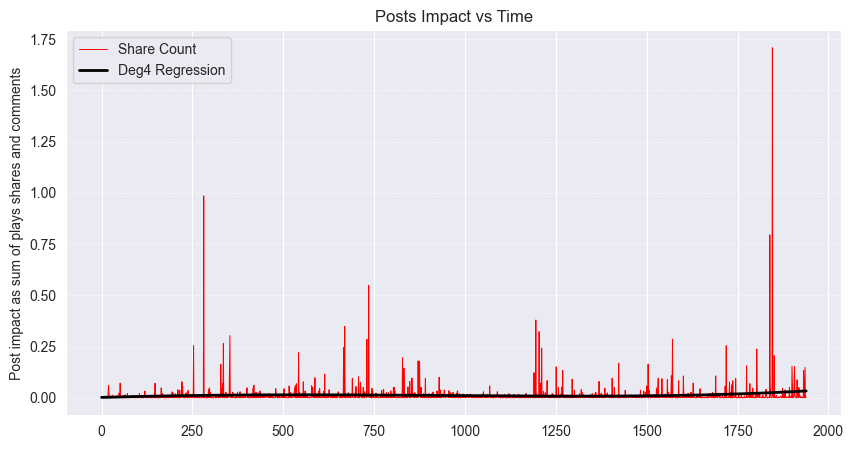

In [214]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red', label='Share Count', linewidth=0.7)
plt.plot(x_smooth, y_smooth, color='black', linewidth=2, label=f'Deg{degree} Regression')
plt.title('Posts Impact vs Time')
plt.ylabel(f'Post impact as sum of plays shares and comments')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [215]:
# let's try to threshold this to high impact posts

n = 0.15
degree = 3

y = y[y > n]
x = np.arange(len(y))
coeffs = np.polyfit(x, y, deg=degree)
poly = np.poly1d(coeffs)
x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = poly(x_smooth)

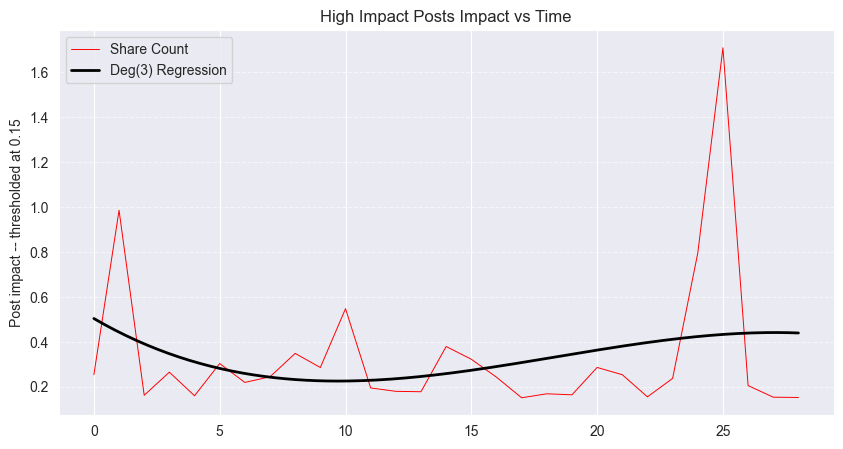

In [216]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='red', label='Share Count', linewidth=0.7)
plt.plot(x_smooth, y_smooth, color='black', linewidth=2, label=f'Deg({degree}) Regression')
plt.title('High Impact Posts Impact vs Time')
plt.ylabel(f'Post impact -- thresholded at {n}')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()